<a href="https://colab.research.google.com/github/evo4np/damp_preprocessing_2018/blob/master/station_8779.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import datetime
import IPython
import IPython.display
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.mlab as mlab

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


# sampling data


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# station_8779 = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/station_8779/59_gata_8779.csv'

In [ ]:
# station_8779 = pd.read_csv(station_8779 ,sep=';', skiprows=13, parse_dates=['Start'], index_col= 'Start')

# New Section

In [ ]:
# station_8779.shape

In [ ]:
# station_8779.head()

In [ ]:
# #Column/Feature Names
# station_8779.columns

In [ ]:
# #Missing /Null values
# station_8779.isnull().sum()

In [ ]:
# #summary of each column in the dataframe
# station_8779.describe()

In [ ]:
# missing_zero_values_table(station_8779)

**Merging Meteorological data**

# Defining Functions

In [ ]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table



#Adding Meteorological Data



**Adding Temperature Data**

In [ ]:
# #uploaded = files.upload()
# temp_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/stockholmA-temp.csv'

In [ ]:
# temp_data = pd.read_csv(temp_data, sep=';', skiprows=9)
# temp_data.head()

In [ ]:
# temp_data.columns

In [ ]:
# cols_name = ['Datum', 'Tid (UTC)', 'Lufttemperatur']
# temp_data = temp_data[cols_name]

In [ ]:
# temp_data.head()

In [ ]:
# temp_data['Date'] = temp_data['Datum']+' '+ temp_data['Tid (UTC)']
# temp_data.head()

In [ ]:
# cols = ['Date', 'Lufttemperatur']
# temp = temp_data[cols]
# temp = temp.rename({'Date':'Datum', 'Luftemperatur':'Air Temperature'},axis=1)

In [ ]:
# temp = temp.set_index('Datum')

In [ ]:
# station_8779 = station_8779.join(temp)

In [ ]:
# station_8779.info()

In [ ]:
# station_8779.head()

In [ ]:
# station_8779 = station_8779.rename({'Lufttemperatur': 'Air Temperature'}, axis=1)

In [ ]:
# station_8779.head()

In [ ]:
# pres_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/StockholmA_air_pressure.csv'
# rh_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/StockholmA_humidity.csv'
# #prec_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/StockholmA_precipitation.csv'

In [ ]:
# pres_data = pd.read_csv(pres_data, sep=';', skiprows=9)
# rh_data = pd.read_csv(rh_data, sep = ';', skiprows=9)
# #prec_data = pd.read_csv(prec_data, sep=';', skiprows=9)

In [ ]:
# pres_data.head()

,Datum,Tid (UTC),Lufttryck reducerat havsytans nivå,Date
0,2012-11-29,11:00:00,1006.6,2012-11-29 11:00:00
1,2012-11-29,12:00:00,1006.2,2012-11-29 12:00:00
2,2012-11-29,13:00:00,1005.9,2012-11-29 13:00:00
3,2012-11-29,14:00:00,1005.7,2012-11-29 14:00:00
4,2012-11-29,15:00:00,1005.6,2012-11-29 15:00:00


In [ ]:
# pres_data.columns

In [ ]:
# cols_name = ['Datum', 'Tid (UTC)', 'Lufttryck reducerat havsytans nivå']
# pres_data = pres_data[cols_name]

In [ ]:
# pres_data.head()

In [ ]:
# pres_data['Date'] = pres_data['Datum']+' '+ pres_data['Tid (UTC)']
# pres_data.head()

In [ ]:
# cols = ['Date', 'Lufttryck reducerat havsytans nivå']
# pres = pres_data[cols]
# pres = pres.rename({'Date':'Datum', 'Lufttryck reducerat havsytans nivå':'Air Pressure'},axis=1)

In [ ]:
# pres.head()

,Air Pressure
Datum,
2012-11-29 11:00:00,1006.6
2012-11-29 12:00:00,1006.2
2012-11-29 13:00:00,1005.9
2012-11-29 14:00:00,1005.7
2012-11-29 15:00:00,1005.6


In [ ]:
# pres = pres.set_index('Datum')

In [ ]:
# station_8779 = station_8779.join(pres)

In [ ]:
# station_8779.info()

In [ ]:
# station_8779.head()

In [ ]:
# rh_data.head()

In [ ]:
# rh_data.columns

In [ ]:
# cols_name = ['Datum', 'Tid (UTC)', 'Relativ Luftfuktighet']
# rh_data = rh_data[cols_name]

In [ ]:
# rh_data.head()

In [ ]:
# rh_data['Date'] = rh_data['Datum']+' '+ rh_data['Tid (UTC)']
# rh_data.head()

In [ ]:
# cols = ['Date', 'Relativ Luftfuktighet']
# rh = rh_data[cols]
# rh = rh.rename({'Date': 'Datum', 'Relativ Luftfuktighet': 'Relative Humidity'}, axis=1)



In [ ]:
# rh = rh.set_index('Datum')

In [ ]:
# station_8779 = station_8779.join(rh)

In [ ]:
# station_8779.head()

**Adding Precipitation Data**

In [ ]:
# prec_data = 'https://raw.githubusercontent.com/evo4np/damp_preprocessing_2018/master/mete/StockholmA/stockholm-precipitation.csv'


In [ ]:
# prec_data = pd.read_csv(prec_data, sep=';', skiprows=9)

In [ ]:
# prec_data.head()

In [ ]:
# prec_data.columns

In [ ]:
# cols_name = ['Datum', 'Tid (UTC)', 'Nederbördsmängd']
# prec_data = prec_data[cols_name]


In [ ]:
# prec_data.head()

In [ ]:
# #join date and time
# prec_data['Date'] = prec_data['Datum']+' '+ prec_data['Tid (UTC)']
# prec_data.head()

In [ ]:
# cols = ['Date', 'Nederbördsmängd']
# prec = prec_data[cols]
# prec = prec.rename({'Date':'Datum', 'Nederbördsmängd':'Precepitation'},axis=1)

In [ ]:
# prec.head()

In [ ]:
# prec = prec.set_index('Datum')

In [ ]:
#station_8779 = station_8779.join(prec)

In [ ]:
# station_8779 = station_8779.join(prec)

In [ ]:
# station_8779.head()

In [ ]:
# station_8779.isnull().sum()

In [ ]:
# station_8779.info()

In [ ]:
# evaluation1_station = station_8779


In [ ]:
# evaluation1_station = evaluation1_station.drop(['Datum'], axis =1)
# evaluation1_station.head()

In [ ]:
# evaluation1_station = evaluation1_station.dropna(axis=0)
# evaluation1_station[evaluation1_station.isnull().any(axis=1)]

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVR

# X = evaluation1_station.drop('Slut', axis=1)
# y = evaluation1_station['Slut']

# X_train, X_test, y_train, y_test = train_test_split(X, y,
# train_size=0.8, test_size=0.2, random_state =0)

# model = SVR(kernel='linear', C=1.0)
# model.fit(X_train, y_train)

# Model with missing and null values

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVR

# X = evaluation1_station.drop('Slut', axis=1)
# y = evaluation1_station['Slut']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state =0)

# model = SVR(kernel='linear', C=1.0)
# model.fit(X_train, y_train)

# Converting Negative Values to NaN

In [ ]:
# pm10 = station_8779['PM10 (182)']
# pm10 = pm10.apply(lambda x:np.nan if x<0 else x)

# pm2_5 = station_8779['PM2.5 (181)']
# pm2_5 = pm2_5.apply(lambda x:np.nan if x<0 else x)


In [ ]:
# pm10.isnull().sum()

In [ ]:
# pm10.describe().transpose()

In [ ]:
# station_8779['PM10 (182)'] = pm10
# station_8779['PM2.5 (181)'] = pm2_5

# Using SimpleImputer

**MEAN**

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# X = station_8779[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
#        'PM2.5 (181)', 'Air Temperature', 'Air Pressure', 'Relative Humidity',
#        'Precepitation']]
# X = imp.fit_transform(X)

**MEDIAN**

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values = np.nan, strategy = 'median')
# X = station_8779[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
#        'PM2.5 (181)', 'Air Temperature', 'Air Pressure', 'Relative Humidity',
#        'Precepitation']]
# X = imp.fit_transform(X)
# print(X)

**MODE**

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# X = station_8779[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
#        'PM2.5 (181)', 'Air Temperature', 'Air Pressure', 'Relative Humidity',
#        'Precepitation']]
# X = imp.fit_transform(X)
# print(X)

# IterativeImputer

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer 
# imp = IterativeImputer(max_iter = 10, random_state =0)
# X = station_8779[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
#        'PM2.5 (181)', 'Air Temperature', 'Air Pressure', 'Relative Humidity',
#        'Precepitation']]
# X = imp.fit_transform(X)
# print(X)

# KNNImputer

In [ ]:
# from sklearn.experimental import enable_iterative

In [ ]:
# from missingpy import KNNImputer
# imp = KNNImputer(n_neighbors=2, weights = 'uniform')
# X = station_8779[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
#        'PM2.5 (181)', 'Air Temperature', 'Air Pressure', 'Relative Humidity',
#        'Precepitation']]
# X = imp.fit_transform(X)
# print(X)


# MissForest

In [ ]:
# from missingpy import MissForest
# imp = MissForest(max_iter = 2)
# X = station_8779[['CO (185)', 'NO2 (183)', 'NOX as NO2 (184)', 'PM10 (182)',
#        'PM2.5 (181)', 'Air Temperature', 'Air Pressure', 'Relative Humidity',
#        'Precepitation']]
# X = imp.fit_transform(X)
# print(X)

In [ ]:
station_8779.info()

In [ ]:
# station_8779.columns

In [ ]:
# station_8779.isnull().sum()

In [ ]:
# from google.colab import drive
# drive.mount('/drive')
# station_8779.to_csv('/drive/My Drive/Bunu/8779_merged.csv')

**Correlation Plot**

# Correlation Plot

In [ ]:
# corl = station_8779.corr()
# sns.heatmap(corl,annot=True)
# plt.show()

In [ ]:
# station_8779.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

**Missing values Plot**

In [ ]:
# import missingno as mno
# mno.matrix(station_8779, figsize = (20,10))

From the above plot. There are 8 columns with missing values

In [ ]:
# station_8779.columns

In [ ]:
# missing_zero_values_table(station_8779)

In [ ]:
# df = station_8779
# df.head()

In [ ]:
# df.columns[df.isnull().any()]
# df.columns[df.isnull().any()].tolist() # to get a list instead of an Index object

In [ ]:
# n_miss_pm10 = df['Air Pressure'].isnull().sum()
# perc = n_miss_pm10 / df.shape[0] * 100
# print(n_miss_pm10, perc)

In [ ]:
#df[df['Air Pressure'].isnull()].index.tolist()
#df[df['PM10 (182)']<0].index.tolist()
# df[df['PM10 (182)']<0].sum()

In [ ]:
# missing_zero_values_table(df)

In [ ]:
# df.head()

In [ ]:
# df_linear = df.interpolate(method='linear', limit_direction='forward', axis=0)


In [ ]:
# df_linear.head()

In [ ]:
# missing_zero_values_table(df_linear)

In [ ]:
# mno.matrix(df_linear, figsize = (20,10))

In [ ]:
# df_linear['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
# from google.colab import drive
# drive.mount('/drive')
#df_linear.to_csv('/drive/My Drive/Bunu/linear1.csv')

In [ ]:
# df_slinear = df.interpolate(method='slinear',  axis=0)


In [ ]:
# missing_zero_values_table(df_slinear)


In [ ]:
# df['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
# df_slinear['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
# df_slinear.plot(subplots=True, figsize=(20,16));

In [ ]:
#df_slinear.to_csv('/drive/My Drive/Bunu/slinear.csv')

In [ ]:
# df_quadratic = df.interpolate(method='quadratic', limit_direction='forward', axis=0)


In [ ]:
# missing_zero_values_table(df_quadratic)

In [ ]:
# df_quadratic['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:

# df_nearest = df.interpolate(method='nearest', limit_direction='forward', axis=0)


In [ ]:
# missing_zero_values_table(df_nearest)

In [ ]:
# df_nearest['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:

# df_time = df.interpolate(method='time', limit_direction='forward', axis=0)


In [ ]:
# missing_zero_values_table(df_time)

In [ ]:
# df_time['PM2.5 (181)'].plot(style=['k--', 'bo-', 'r*'], figsize=(30, 10));

In [ ]:
# mno.matrix(df_time, figsize = (20,10))

In [ ]:
# df_PM10 = df['PM10 (182)']
# df_PM10.head()

In [ ]:
# #Resampling PM10 weekly
# weekly = df_PM10.resample('W').sum()
# weekly.plot (style=[':','--','-'])

In [ ]:
# #Resampling
# weekly = df.resample('W').sum()
# weekly.plot (style=[':','--','-'])

In [ ]:
# #Daily
# daily = df.resample('D').sum()
# daily.rolling (30, center=True).sum().plot(style=[':','--','-'])

In [ ]:
# #Daily resampling PM10
# daily = df_PM10.resample('D').sum()
# daily.rolling (30, center=True).sum().plot(style=[':','--','-'])

In [ ]:
# #hourly
# by_time = df.groupby(df.index.time).mean()
# hourly_ticks = 4*60*60*np.arange(6)
# by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

In [ ]:
# #hourly resampling PM10
# #hourly
# by_time = df_PM10.groupby(df_PM10.index.time).mean()
# hourly_ticks = 4*60*60*np.arange(6)
# by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

Modelling with prophet
Prophet is designed for analyzing time series with daily observations that display patterns on different time scales. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Before using Prophet, we rename the columns in our data to the correct format. The Date column must be called ‘ds’ and the value column we want to predict ‘y’

In [ ]:
# #LSTM(Long Short Term Memory) prediction
# mydata = df.loc[:,['PM10 (182)']]
# # mydata = mydata.set_index(df)
# mydata.head()

In [ ]:
# #normalizing-rescale the data o the range of [0,1]or[-1,1]
# from sklearn.preprocessing import MinMaxScaler
# values = mydata['PM10 (182)'].values.reshape(-1,1)
# values = values.astype('float32')
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled = scaler.fit_transform(values)

In [ ]:
# #splitting the dataset
# train_size = int (len(scaled) * 0.8)
# test_size = len (scaled) - train_size
# train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
# print (len(train), len(test))

defining a function to create a new dataset and use this function to prepare the train and test datasets for modeling.

In [ ]:
# def create_dataset (dataset, look_back=1):
#   dataX, dataY =[], []
#   for i in range(len(dataset)-look_back):
#     a = dataset[i:(i+ look_back),0]
#     dataX.append(a)
#     dataY.append(dataset[i+ look_back,0])
#   print(len(dataY))
#   return np.array(dataX), np.array(dataY)

In [ ]:
# look_back = 2
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)

Our data is currently in the form [samples, features] and we are framing the problem as two time steps for each sample. We can transform the prepared train and test input data into the expected structure

In [ ]:
# trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# model = Sequential()
# model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer ='adam')
# history = model.fit(trainX, trainY, epochs=300, batch_size=100, vaidation_data=(testX, testY), verbose= 0, shuffle = False)

# Second Section

In [6]:
#read the data
df = 'https://raw.githubusercontent.com/praveenswamy65/Uppsala_ProjectCS_2020/master/8779/8779_merged.csv?token=ANXEMBTOPOCEYXDUTPL5CJK7TGGNU'
df = pd.read_csv(df)
df.head()

,Start,Slut,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation
0,2014-01-01 00:00:00,2014-01-01 01:00,0.41,27.7,58.4,69.8,45.7,2.9,1015.7,92.0,0.0
1,2014-01-01 01:00:00,2014-01-01 02:00,0.27,40.4,72.5,23.9,16.3,2.8,1015.9,93.0,0.0
2,2014-01-01 02:00:00,2014-01-01 03:00,0.35,28.1,49.8,13.9,6.6,3.2,1015.4,94.0,0.0
3,2014-01-01 03:00:00,2014-01-01 04:00,0.24,16.9,28.9,16.8,8.5,3.6,1015.2,93.0,0.0
4,2014-01-01 04:00:00,2014-01-01 05:00,0.28,21.1,32.5,16.7,6.6,3.0,1014.8,92.0,0.0


In [7]:
# shape and type of data
# print(df.shape)
print(df.dtypes)

Start                 object
Slut                  object
CO (185)             float64
NO2 (183)            float64
NOX as NO2 (184)     float64
PM10 (182)           float64
PM2.5 (181)          float64
Air Temperature      float64
Air Pressure         float64
Relative Humidity    float64
Precepitation        float64
dtype: object


In [8]:
#select numeric column
df_numeric = df.select_dtypes(include =[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['CO (185)' 'NO2 (183)' 'NOX as NO2 (184)' 'PM10 (182)' 'PM2.5 (181)'
 'Air Temperature' 'Air Pressure' 'Relative Humidity' 'Precepitation']


**heatmap for the data**

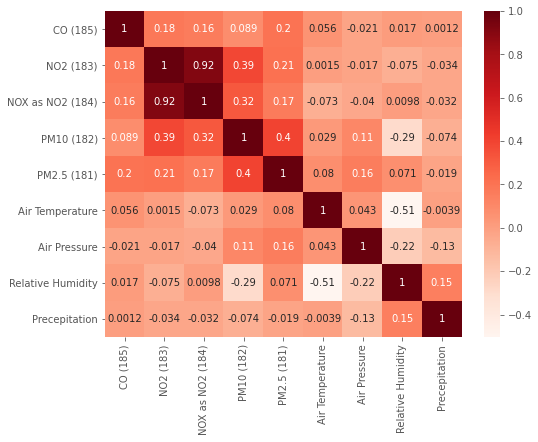

In [15]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**Visualizing the dataset**

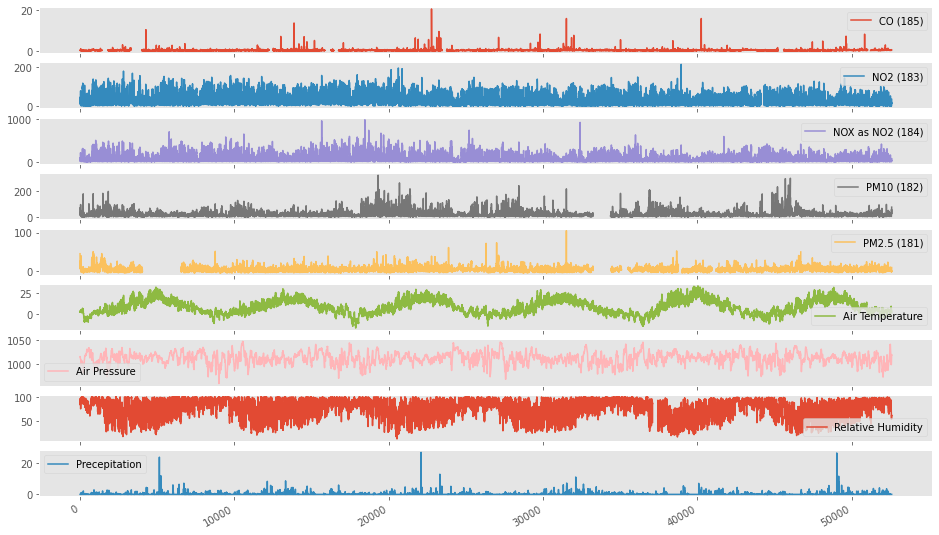

In [17]:
df.plot(subplots= True, figsize=(16,10));

# Working with Missing Data

**Missing data**

**#1 Missing Data Heatmap**

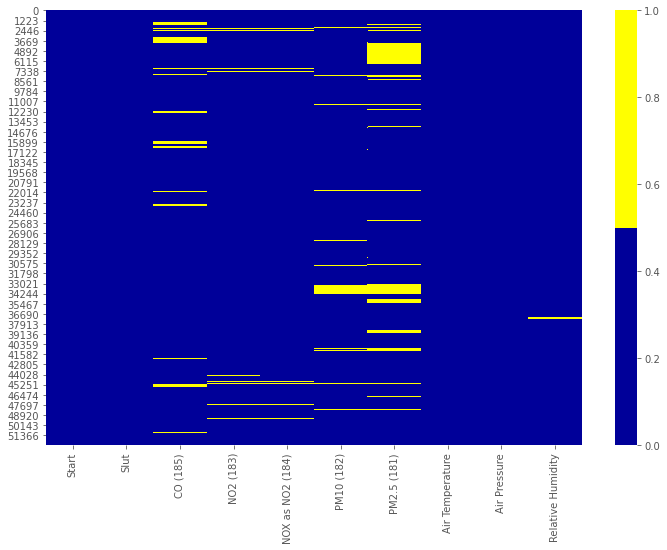

In [ ]:
cols = df.columns[:10] # first 10 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

**#2 Missing Data List**

In [ ]:
missing_zero_values_table(df)

Your selected dataframe has 11 columns and 52584 Rows.
There are 9 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
PM2.5 (181),236,6732,12.8,6968,13.3,float64
CO (185),0,3552,6.8,3552,6.8,float64
PM10 (182),22,2156,4.1,2178,4.1,float64
NO2 (183),0,841,1.6,841,1.6,float64
NOX as NO2 (184),0,645,1.2,645,1.2,float64
Relative Humidity,0,375,0.7,375,0.7,float64
Precepitation,47223,186,0.4,47409,90.2,float64
Air Pressure,0,27,0.1,27,0.1,float64
Air Temperature,247,23,0.0,270,0.5,float64


**#3 Missing Data HIstogram**

created missing indicator for: CO (185)
created missing indicator for: NO2 (183)
created missing indicator for: NOX as NO2 (184)
created missing indicator for: PM10 (182)
created missing indicator for: PM2.5 (181)
created missing indicator for: Air Temperature
created missing indicator for: Air Pressure
created missing indicator for: Relative Humidity
created missing indicator for: Precepitation


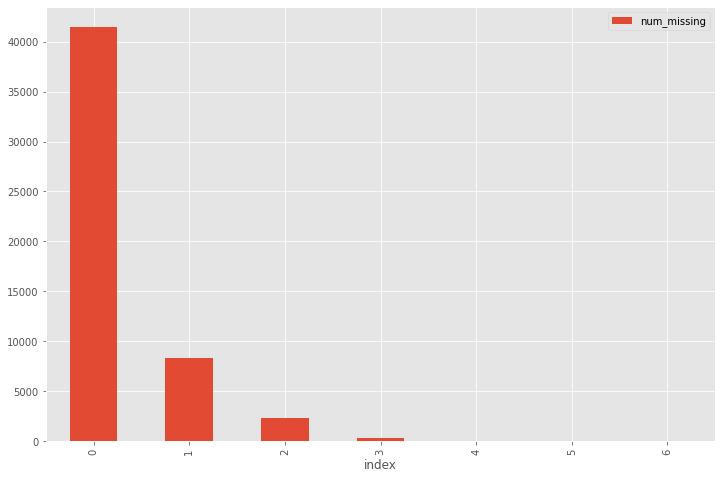

In [ ]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [ ]:
df.describe()

,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation,num_missing
count,49032.000000,51743.000000,51939.000000,50428.000000,45852.000000,52561.000000,52557.000000,52209.000000,52398.000000,52584.000000
mean,0.335007,33.604750,66.411269,19.759548,5.688373,8.438698,1012.356744,75.955123,0.065422,0.276453
std,0.388743,23.285529,65.941538,18.367639,5.272743,7.829768,11.590300,18.291926,0.406504,0.598736
min,0.040000,0.400000,0.100000,-3.000000,-3.000000,-15.900000,960.800000,12.000000,0.000000,0.000000
25%,0.230000,15.800000,22.100000,9.100000,2.400000,2.300000,1005.400000,64.000000,0.000000,0.000000
50%,0.300000,28.000000,44.500000,14.600000,4.700000,7.600000,1012.800000,80.000000,0.000000,0.000000
75%,0.380000,46.200000,87.900000,23.700000,7.700000,14.500000,1019.800000,91.000000,0.000000,0.000000
max,20.700000,212.800000,982.500000,324.500000,105.000000,32.700000,1046.700000,100.000000,27.100000,6.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cc8584128>,
      dtype=object)

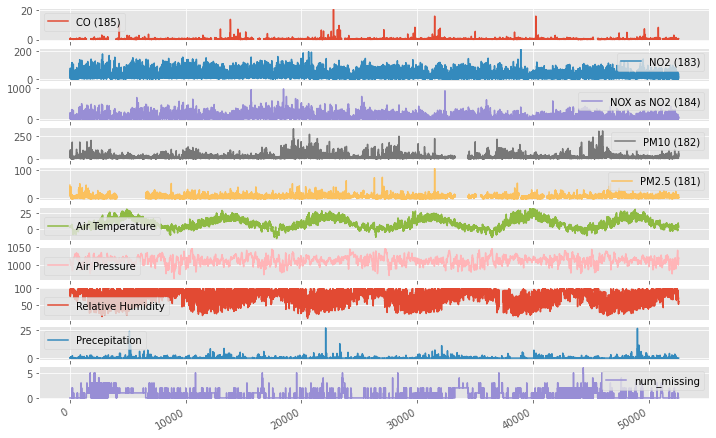

In [ ]:
df.plot(subplots=True)

In [ ]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: CO (185)
imputing missing values for: NO2 (183)
imputing missing values for: NOX as NO2 (184)
imputing missing values for: PM10 (182)
imputing missing values for: PM2.5 (181)
imputing missing values for: Air Temperature
imputing missing values for: Air Pressure
imputing missing values for: Relative Humidity
imputing missing values for: Precepitation


In [ ]:
#If there is missig values in categorical features
# # impute the missing values and create the missing value indicator variables for each non-numeric column.
# df_non_numeric = df.select_dtypes(exclude=[np.number])
# non_numeric_cols = df_non_numeric.columns.values

# for col in non_numeric_cols:
#     missing = df[col].isnull()
#     num_missing = np.sum(missing)
    
#     if num_missing > 0:  # only do the imputation for the columns that have missing values.
#         print('imputing missing values for: {}'.format(col))
#         df['{}_ismissing'.format(col)] = missing
        
#         top = df[col].describe()['top'] # impute with the most frequent value.
#         df[col] = df[col].fillna(top)

In [ ]:
missing_zero_values_table(df)

Your selected dataframe has 21 columns and 52584 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


In [ ]:
df.describe()

,CO (185),NO2 (183),NOX as NO2 (184),PM10 (182),PM2.5 (181),Air Temperature,Air Pressure,Relative Humidity,Precepitation,num_missing
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000
mean,0.332643,33.515111,66.142503,19.548001,5.561838,8.438331,1012.356972,75.983969,0.065191,0.276453
std,0.375486,23.109266,65.580225,18.016218,4.934726,7.828075,11.587329,18.229761,0.405803,0.598736
min,0.040000,0.400000,0.100000,-3.000000,-3.000000,-15.900000,960.800000,12.000000,0.000000,0.000000
25%,0.230000,16.000000,22.300000,9.300000,2.800000,2.300000,1005.400000,64.000000,0.000000,0.000000
50%,0.300000,28.000000,44.500000,14.600000,4.700000,7.600000,1012.800000,80.000000,0.000000,0.000000
75%,0.370000,45.800000,87.000000,23.100000,7.200000,14.500000,1019.800000,91.000000,0.000000,0.000000
max,20.700000,212.800000,982.500000,324.500000,105.000000,32.700000,1046.700000,100.000000,27.100000,6.000000


# Outliers

**Outliers**

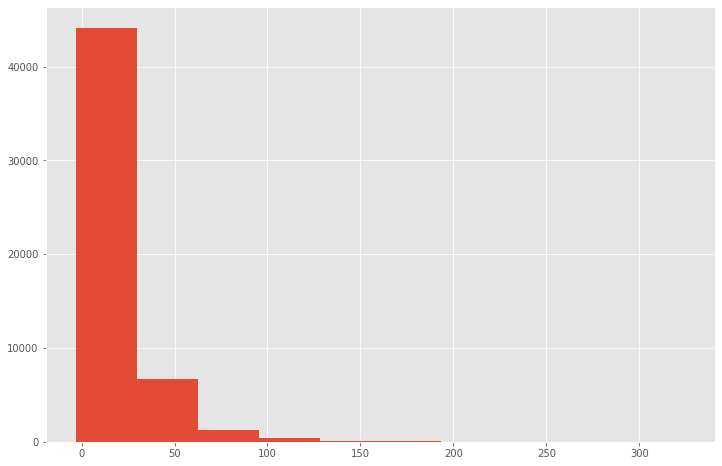

In [ ]:
#1.Histogram
df['PM10 (182)'].hist(bins=10)

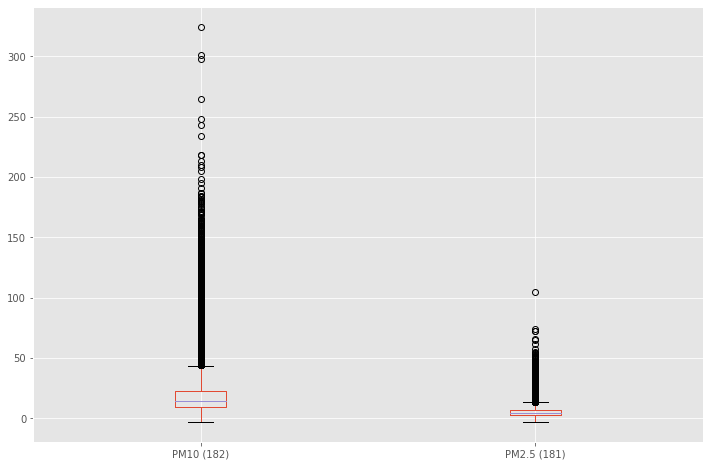

In [ ]:
#2.Box Plot
df.boxplot(column=['PM10 (182)', 'PM2.5 (181)'])

**Technique #2 Descriptive Statictics**

> the outliers could be too distinct that the box plot can’t visualize them. Instead, we can look at their descriptive statistics.


> For example, for the feature PM10 (182), we can see that the maximum value is 324, while the 75% quartile is only 23.10. The 324.50 value is an outlier.





In [ ]:
df['PM10 (182)'].describe()

count    52584.000000
mean        19.548001
std         18.016218
min         -3.000000
25%          9.300000
50%         14.600000
75%         23.100000
max        324.500000
Name: PM10 (182), dtype: float64

**Technique #3 Bar Chart**

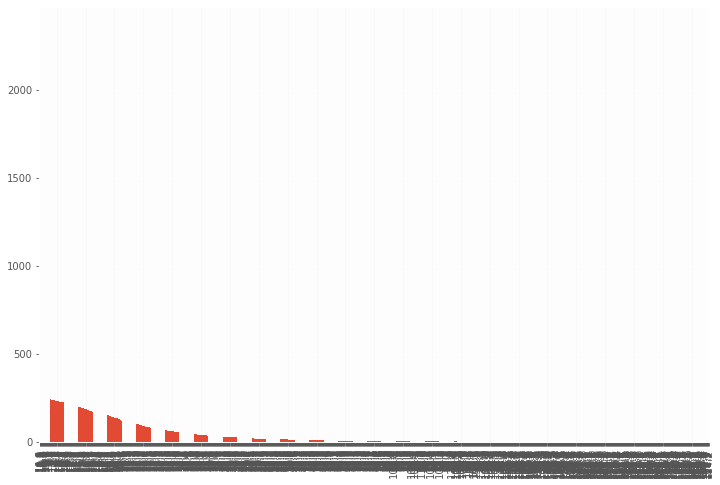

In [ ]:
df['PM10 (182)'].value_counts().plot.bar()

# Unnecessary data

After done with missing data and outliers. It is better to look at the unnecessary data.

If the data doesn't serve the purpose of the project then it's better to remove the data. 

We cover three main types of unnecessary data:


> 1. Uninformative/Repetitive
> 2. Irrelevant
> 3. Duplicates











In [ ]:
# #1. Uninformative/Repetitive
# #If it has too many same values
# #We can create a list of features with a high percentage of the same value.For example, we specify below to show features with over 95% rows being the same value.
# num_rows = len(df.index)
# low_information_cols = [] #

# for col in df.columns:
#     cnts = df[col].value_counts(dropna=False)
#     top_pct = (cnts/num_rows).iloc[0]
    
#     if top_pct > 0.95:
#         low_information_cols.append(col)
#         print('{0}: {1:.5f}%'.format(col, top_pct*100))
#         print(cnts)
#         print()